In [1]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

In [2]:
df = dd.read_parquet('../Data/cleaned_data/')

In [3]:
df.columns

Index(['Fecha', 'Entidad', 'Municipio', 'Bien jurídico afectado',
       'Tipo de delito', 'Modalidad', 'Incidentes'],
      dtype='object')

In [4]:
df["Fecha"].max().compute()


Timestamp('2025-05-31 00:00:00')

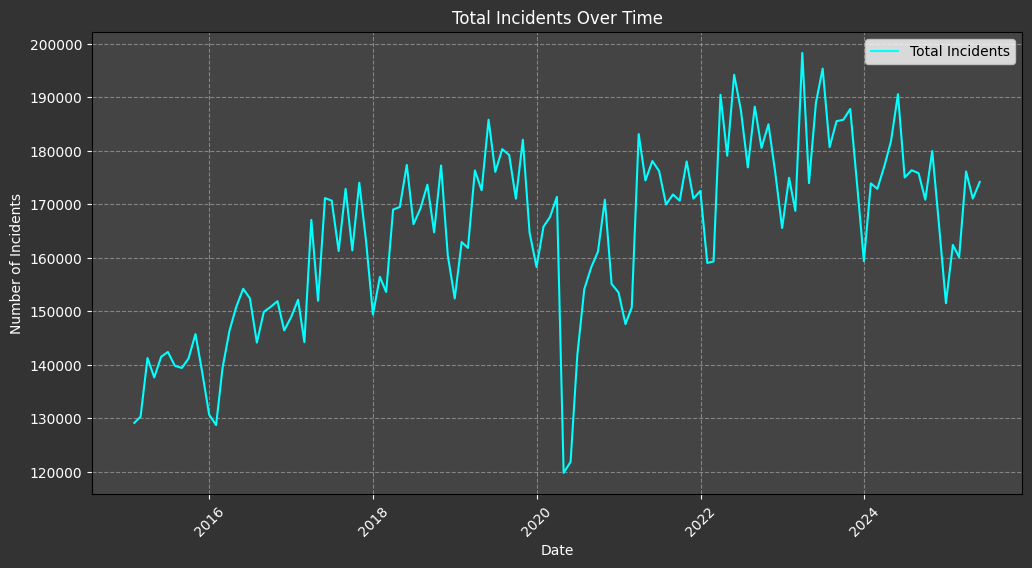

In [18]:
# general national tendency
df_general = (
    df.groupby('Fecha')['Incidentes']
    .sum()
    .compute()
    .reset_index()
)
with plt.style.context('seaborn-v0_8-dark-palette'):
    fig, ax = plt.subplots(figsize=(12, 6), facecolor="#333333")
    ax.set_facecolor("#444444")

    ax.plot(df_general['Fecha'], df_general['Incidentes'], label='Total Incidents', color='cyan')
    ax.set_title('Total Incidents Over Time', color='white')
    ax.set_xlabel('Date', color='white')
    ax.set_ylabel('Number of Incidents', color='white')
    plt.setp(ax.get_xticklabels(), rotation=45)
    ax.legend(loc='upper right')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(colors='white')
    plt.savefig('../Outputs/Images/total_incidents_over_time.png', bbox_inches='tight')
    plt.show()

In [22]:
desc = df_general['Incidentes'].describe()

desc_df = desc.to_frame(name="Valor")

desc_df.reset_index(inplace=True)
desc_df.rename(columns={"index": "Estadística"}, inplace=True)

desc_df.to_csv("../Outputs/Tables/descripcion_incidentes.csv", index=False)

In [34]:
df_entidad = (
    df.groupby('Entidad')['Incidentes']
    .sum()
    .compute()
    .reset_index()
)
df_entidad = df_entidad.sort_values(by='Incidentes', ascending=False, ignore_index=True)
df_entidad.to_csv("../Outputs/Tables/total_incidents_by_entity.csv", index=False)

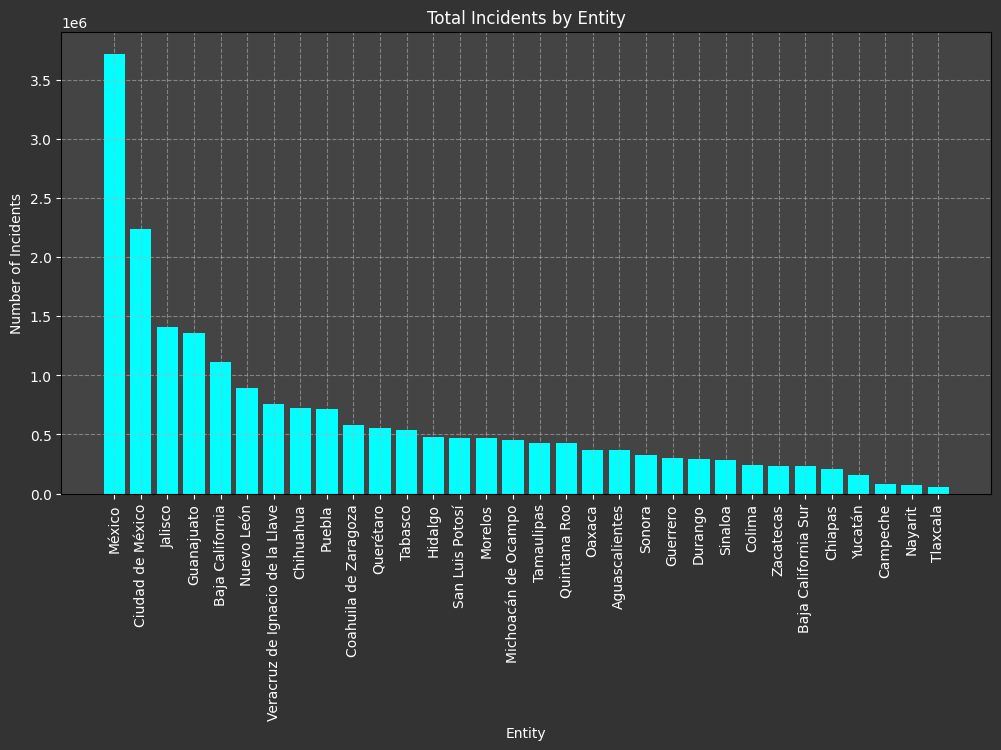

In [36]:
with plt.style.context('seaborn-v0_8-dark-palette'):
    fig, ax = plt.subplots(figsize=(12, 6), facecolor="#333333")
    ax.set_facecolor("#444444")
    ax.bar(df_entidad['Entidad'], df_entidad['Incidentes'], color='cyan')
    ax.set_title('Total Incidents by Entity', color='white')
    ax.set_xlabel('Entity', color='white')
    ax.set_ylabel('Number of Incidents', color='white')
    plt.setp(ax.get_xticklabels(), rotation=90)
    ax.tick_params(colors='white')
    ax.grid(True, linestyle='--', alpha=0.6)
    plt.savefig('../Outputs/Images/total_incidents_by_entity.png', bbox_inches='tight')
    plt.show()

In [38]:
n_series = (
	df[["Entidad", "Municipio", "Tipo de delito", "Modalidad"]]
	.drop_duplicates()
	.shape[0]
	.compute()
)

In [39]:
n_series

169048